In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [ ]:
# Fetch daily stock prices for Google
microsoft_data = yf.download('MSFT', start='2018-01-01', end='2024-08-16')['Adj Close']

# Fetch data for dependent variables
sp500_data = yf.download('^GSPC', start='2018-01-01', end='2024-08-16')['Adj Close']
google_data = yf.download('GOOGL', start='2018-01-01', end='2024-08-16')['Adj Close']
amazon_data = yf.download('AMZN', start='2018-01-01', end='2024-08-16')['Adj Close']
#gold_data = yf.download('GLD', start='2018-01-01', end='2024-08-16')['Adj Close']
nasdaq_data = yf.download('^IXIC', start='2018-01-01', end='2024-08-16')['Adj Close']
usd_index_data = yf.download('DX-Y.NYB', start='2018-01-01', end='2024-08-16')['Adj Close']
#crude_oil_data = yf.download('CL=F', start='2018-01-01', end='2024-08-16')['Adj Close']
interest_rate_data = yf.download('^TNX', start='2018-01-01', end='2024-08-16')['Adj Close']

# Combine all data into a single DataFrame
df = pd.DataFrame({
    'Microsoft': microsoft_data,
    'SPY': sp500_data,
    'Google': google_data,
    'Amazon': amazon_data,
    #'Gold': gold_data,
    'NASDAQ': nasdaq_data,
    'USD_Index': usd_index_data,
    #'Crude Oil': crude_oil_data,
    'Interest_Rate': interest_rate_data
})

# Drop rows with missing data
df.dropna(inplace=True)

daily_returns = df.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
daily_returns.head()

,Microsoft,S&P 500,Google,Amazon,NASDAQ,USD Index,Interest Rate
Date,,,,,,,
2018-01-03,0.004654,0.006399,0.017061,0.012775,0.008367,0.003375,-0.007302
2018-01-04,0.008802,0.004029,0.003884,0.004476,0.001752,-0.003364,0.002452
2018-01-05,0.012398,0.007034,0.013260,0.016163,0.008286,0.001089,0.009376
2018-01-08,0.001020,0.001662,0.003531,0.014425,0.002919,0.004133,0.001615
2018-01-09,-0.000680,0.001303,-0.001274,0.004676,0.000865,0.002166,0.026613


In [ ]:
df.head()

,Microsoft,S&P 500,Gold,NASDAQ,USD Index,Crude Oil,Interest Rate
Date,,,,,,,
2018-01-02,79.792908,2695.810059,125.150002,7006.899902,91.849998,60.369999,2.465
2018-01-03,80.164261,2713.060059,124.820000,7065.529785,92.160004,61.630001,2.447
2018-01-04,80.869843,2723.989990,125.459999,7077.910156,91.849998,62.009998,2.453
2018-01-05,81.872475,2743.149902,125.330002,7136.560059,91.949997,61.439999,2.476
2018-01-08,81.956009,2747.709961,125.309998,7157.390137,92.330002,61.730000,2.480


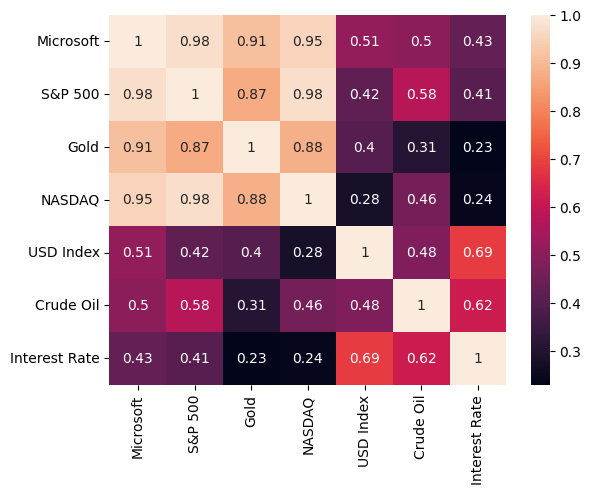

In [ ]:
c = df.corr()
sns.heatmap(c, annot=True)
plt.show()

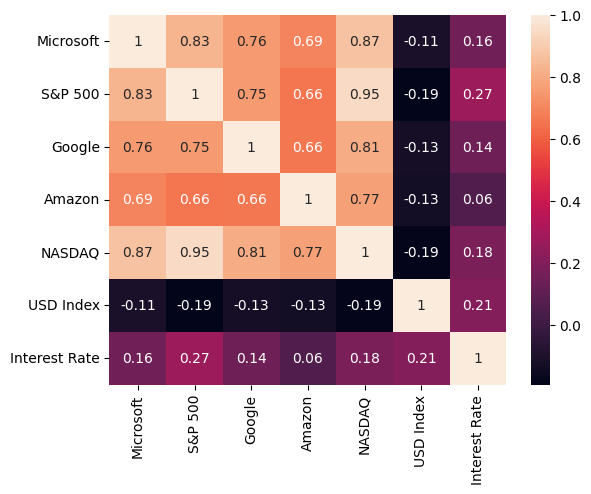

In [ ]:
cor = daily_returns.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
# Function to calculate correlation coefficient between two arrays


def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

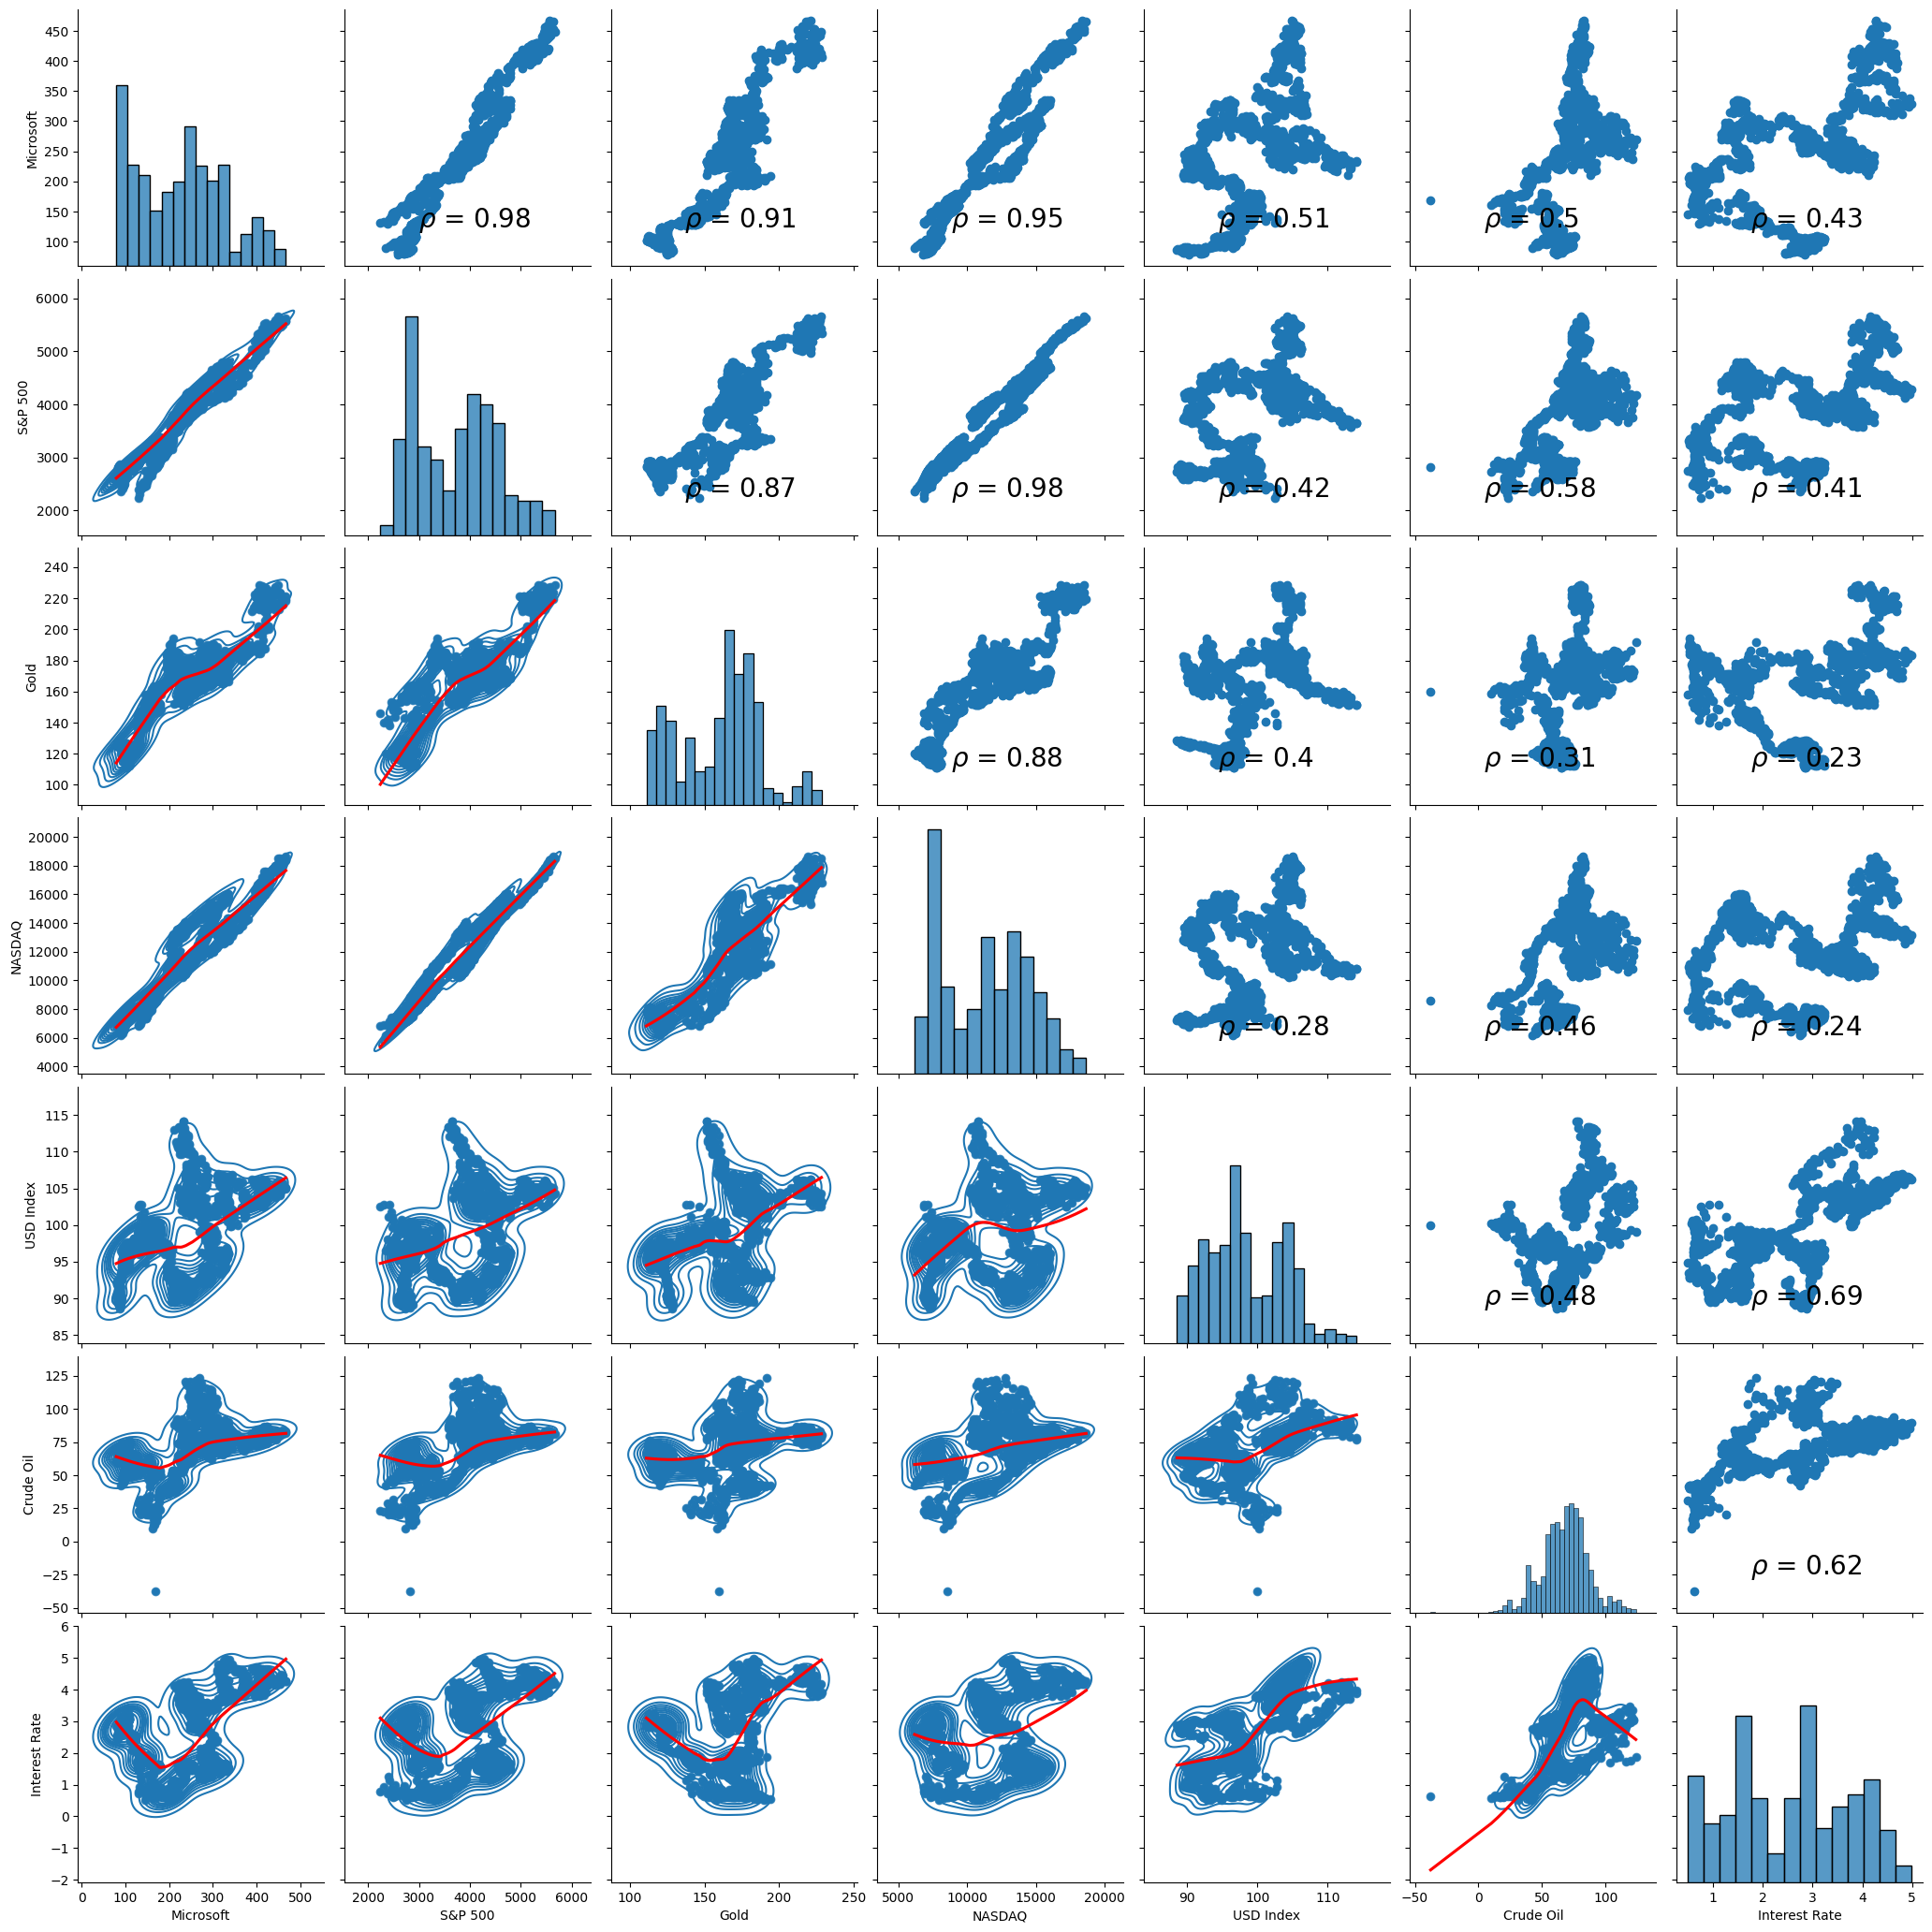

In [ ]:
# Create the default pairplot
grid = sns.pairplot(
    df, vars=["Microsoft", "Google" + "Amazon" + "S&P 500", "Gold", "NASDAQ", "USD Index", "Crude Oil", "Interest Rate"], height=3
)

# Map a scatter plot and Pearson correlation coefficient to the upper triangle
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)

# Map a histogram to the diagonal
# grid = grid.map_diag(plt.hist)

# Map a density plot and regression line to the lower triangle
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

plt.savefig("pairplot_output.png", dpi=300, bbox_inches='tight')
plt.show()





In [ ]:
# KO Excess Return Regression Model with Eight Independent Variables
model_1 = smf.ols(
    "Microsoft ~ SPY + Google + Amazon + NASDAQ + USD_Index + Interest_Rate",
    data=daily_returns,
).fit()
model_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Microsoft   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     949.7
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:59:53   Log-Likelihood:                 5524.5
No. Observations:                1665   AIC:                        -1.104e+04
Df Residuals:                    1658   BIC:                        -1.100e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0004      0.000      1.905      0.057   -1.22e-05       0.001
SPY               0.1140      0.060      1.892      0.059      -0.004       0.232
Google            0.1354      0.019      7.220      0.000       0.099       0.172
Amazon            0.0396      0.017      2.393      0.017       0.007       0.072
NASDAQ            0.8098      0.060     13.406      0.000       0.691       0.928
USD_Index         0.2448      0.055      4.441      0.000       0.137       0.353
Interest_Rate    -0.0110      0.007     -1.624      0.105      -0.024       0.002
==============================================================================
Omnibus:                      370.748   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3973.200
Skew:                           0.722   Prob(JB):                         0.00
Kurtosis:                      10.429   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Parameters with high precision
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.000411,0.000216,1.904969,5.695699e-02,-0.000012,0.000834
SPY,0.113950,0.060213,1.892461,5.860370e-02,-0.004151,0.232052
Google,0.135414,0.018755,7.220120,7.879462e-13,0.098628,0.172200
Amazon,0.039637,0.016564,2.392920,1.682557e-02,0.007148,0.072127
NASDAQ,0.809843,0.060410,13.405753,5.542207e-39,0.691355,0.928331
USD_Index,0.244832,0.055130,4.440974,9.547080e-06,0.136700,0.352964
Interest_Rate,-0.010993,0.006771,-1.623606,1.046500e-01,-0.024274,0.002287


In [ ]:
# Parameters with 6 significant digits
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.000411,0.000216,1.904969,5.695699e-02,-0.000012,0.000834
SPY,0.113950,0.060213,1.892461,5.860370e-02,-0.004151,0.232052
Google,0.135414,0.018755,7.220120,7.879462e-13,0.098628,0.172200
Amazon,0.039637,0.016564,2.392920,1.682557e-02,0.007148,0.072127
NASDAQ,0.809843,0.060410,13.405753,5.542207e-39,0.691355,0.928331
USD_Index,0.244832,0.055130,4.440974,9.547080e-06,0.136700,0.352964
Interest_Rate,-0.010993,0.006771,-1.623606,1.046500e-01,-0.024274,0.002287


In [ ]:
labels = [
    "Intercept",
    "SPY",
    "Google",
    "Amazon",
    "NASDAQ",
    "USD_Index",
    "Interest_Rate",
]

variables = model_1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"])

,VIF
SPY,12.482679
Google,2.889103
Amazon,2.833170
NASDAQ,17.953408
USD_Index,1.126681
Interest_Rate,1.240289
